<a href="https://colab.research.google.com/github/ActiveStacks/ExperimentTwo/blob/main/Copy_of_EXPERIMENT_CODEBERTLLM_2E4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
path4 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
# path7 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Combined_Processed.csv')

In [47]:
df = pd.read_csv(path4)

In [48]:

from sklearn.model_selection import train_test_split

In [49]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,// Copyright 2019 Matthew Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,package org.mattvchandler.a2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.mattvchandler.a2050
3,3,NaN,NaN,NaN,import android.animation.ArgbEvaluator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.animation.ArgbEvaluator
4,4,NaN,NaN,NaN,import android.app.Dialog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.app.Dialog


In [50]:
df.dropna()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
1729,1729,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","private static final String KEY_USERNAME = ""us...",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private static final String KEY_USERNAME = ""us..."
2383,2383,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","const val CHANGES_SEEN_KEY = ""nerd.tuxmobil.fa...",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"const val CHANGES_SEEN_KEY = ""user_str"""
2384,2384,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","const val DISPLAY_DAY_INDEX_KEY = ""nerd.tuxmob...",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"const val DISPLAY_DAY_INDEX_KEY = ""user_str"""
2385,2385,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","const val ENGELSYSTEM_SHIFTS_HASH_KEY = ""nerd....",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"const val ENGELSYSTEM_SHIFTS_HASH_KEY = ""user_..."
2386,2386,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","const val SCHEDULE_LAST_FETCHED_AT_KEY = ""nerd...",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"const val SCHEDULE_LAST_FETCHED_AT_KEY = ""user..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929711,2214209,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",public static final String PREF_KEY_STATE_USER...,warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,public static final String PREF_KEY_STATE_USER...
1929717,2214215,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",public static final String PREF_KEY_STATE_PASS...,warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,public static final String PREF_KEY_STATE_PASS...
1929966,2214479,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",return !downloadFile.exists() && Environment.M...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return !downloadFile.exists() && Environment.M...
1929987,2214506,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",Environment.MEDIA_MOUNTED == Environment.getEx...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,Environment.MEDIA_MOUNTED == Environment.getEx...


In [51]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,// Copyright 2019 Matthew Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,package org.mattvchandler.a2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.mattvchandler.a2050
3,3,NaN,NaN,NaN,import android.animation.ArgbEvaluator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.animation.ArgbEvaluator
4,4,NaN,NaN,NaN,import android.app.Dialog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.app.Dialog


In [52]:
df.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
1930469,2215094,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(TAG, ""mConnectedThread: read ""+Integer.t...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(TAG, ""user_str""+Integer.toString(bufferI..."
1930470,2215095,NaN,NaN,NaN,mHandler.obtainMessage(R.string.HXM_SERVICE_MS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,mHandler.obtainMessage(R.string.HXM_SERVICE_MS...
1930471,2215098,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",File zephyrlogFolder = new File(Environment.ge...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,File zephyrlogFolder = new File(Environment.ge...
1930472,2215099,NaN,NaN,NaN,"Log.d(TAG,""getFirstConnectedHxm() found a devi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"Log.d(TAG,""user_str""+mHxMName+""user_str"");"
1930473,2215100,NaN,NaN,NaN,"Log.d(TAG, ""handleMessage(): MESSAGE_STATE_CH...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"Log.d(TAG, ""user_str"" + msg.arg1);"


In [53]:
df.shape

(1930474, 15)

In [54]:
df.describe()

,index,CVSS,Vulnerability_status
count,1.930474e+06,33622.000000,1.930474e+06
mean,1.066211e+06,6.324332,1.741645e-02
std,6.455911e+05,1.632369,1.308171e-01
min,0.000000e+00,0.000000,0.000000e+00
25%,5.058782e+05,4.300000,0.000000e+00
50%,1.027370e+06,7.500000,0.000000e+00
75%,1.628990e+06,7.500000,0.000000e+00
max,2.215100e+06,8.800000,1.000000e+00


In [55]:
df.columns

Index(['index', 'Description', 'Type', 'Pattern', 'Code', 'Severity',
       'Input Case', 'CVSS', 'CWE_ID', 'CWE_Desc', 'OWASP_Mobile',
       'OWSAP_MASVS', 'Reference', 'Vulnerability_status', 'processed_code'],
      dtype='object')

In [56]:
df.nunique()

,0
index,1930474
Description,29
Type,4
Pattern,29
Code,1916581
Severity,4
Input Case,2
CVSS,10
CWE_ID,12
CWE_Desc,12


In [57]:
df['Vulnerability_status'].unique()

array([0, 1])

In [58]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    1896852
1      33622
Name: count, dtype: int64


In [59]:
df_safe = df[df['Vulnerability_status']==0]

In [60]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [61]:
df_safe.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,// Copyright 2019 Matthew Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,package org.mattvchandler.a2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.mattvchandler.a2050
3,3,NaN,NaN,NaN,import android.animation.ArgbEvaluator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.animation.ArgbEvaluator
4,4,NaN,NaN,NaN,import android.app.Dialog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.app.Dialog


In [62]:
df_safe.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
1930467,2215092,NaN,NaN,NaN,buffer[bufferIndex++] = (byte) (b = mmInStream...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,buffer[bufferIndex++] = (byte) (b = mmInStream...
1930468,2215093,NaN,NaN,NaN,if ((b = mmInStream.read()) != ETX ),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,if ((b = mmInStream.read()) != ETX )
1930470,2215095,NaN,NaN,NaN,mHandler.obtainMessage(R.string.HXM_SERVICE_MS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,mHandler.obtainMessage(R.string.HXM_SERVICE_MS...
1930472,2215099,NaN,NaN,NaN,"Log.d(TAG,""getFirstConnectedHxm() found a devi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"Log.d(TAG,""user_str""+mHxMName+""user_str"");"
1930473,2215100,NaN,NaN,NaN,"Log.d(TAG, ""handleMessage(): MESSAGE_STATE_CH...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"Log.d(TAG, ""user_str"" + msg.arg1);"


In [63]:
df_vulnerable.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
80,80,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""MainActivity"", ""Could not get data dire...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", e)"
304,304,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,System.out.printf(prompt);,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.printf(prompt);
308,308,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,System.out.println(shell.runCommand(cmd));,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.println(shell.runCommand(cmd));
332,332,App can write to App Directory. Sensitive Info...,RegexOr,"['MODE_PRIVATE', 'Context\\.MODE_PRIVATE']",val sp = app.getPreferences(Context.MODE_PRIVATE),info,exact,3.9,CWE-276,Incorrect Default Permissions,NaN,MSTG-STORAGE-14,NaN,1,val sp = app.getPreferences(Context.MODE_PRIVATE)
516,516,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(TAG, ""Failed to parse color"", e);",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(TAG, ""user_str"", e);"


In [64]:
df_vulnerable.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
1930354,2214925,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(TAG, ""...crc "" + (crc));",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(TAG, ""user_str"" + (crc));"
1930355,2214926,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(TAG, ""...etx "" + (etx));",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(TAG, ""user_str"" + (etx));"
1930377,2214958,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(TAG, ""setState() "" + mState + "" -> "" + s...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(TAG, ""user_str"" + mState + "" -> "" + state);"
1930469,2215094,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(TAG, ""mConnectedThread: read ""+Integer.t...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(TAG, ""user_str""+Integer.toString(bufferI..."
1930471,2215098,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",File zephyrlogFolder = new File(Environment.ge...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,File zephyrlogFolder = new File(Environment.ge...


In [65]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [66]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [67]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [68]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [69]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
0    33622
1    33622
Name: count, dtype: int64


In [70]:
print(df_balanced.value_counts())

index    Description                                                                                 Type     Pattern                                                                                                                                                                                            Code                                                                                         Severity  Input Case  CVSS  CWE_ID   CWE_Desc                                    OWASP_Mobile               OWSAP_MASVS      Reference                                                                                                                                  Vulnerability_status  processed_code                                                                         
2215098  App can read/write to External Storage. Any App can read data written to External Storage.  RegexOr  ['\\.getExternalStorage', '\\.getExternalFilesDir\\(']                                                                

<Axes: >

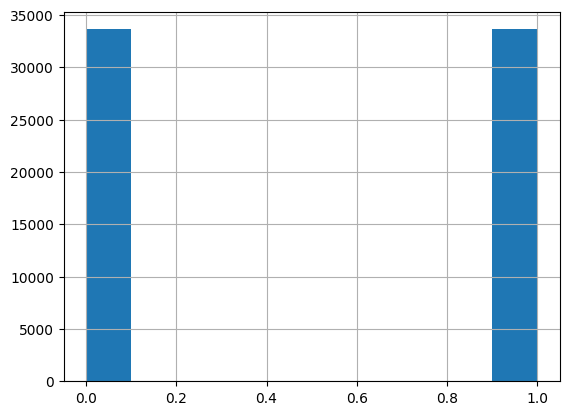

In [71]:
df_balanced['Vulnerability_status'].hist()

In [72]:
df_balanced.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,1329785,NaN,NaN,NaN,fun String.toFeature() = Feature.values().find...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,fun String.toFeature() = Feature.values().find...
1,913368,App can write to App Directory. Sensitive Info...,RegexOr,"['MODE_PRIVATE', 'Context\\.MODE_PRIVATE']","val meta = context.getSharedPreferences(""meta""...",info,exact,3.9,CWE-276,Incorrect Default Permissions,NaN,MSTG-STORAGE-14,NaN,1,"val meta = context.getSharedPreferences(""user_..."
2,501620,Hidden elements in view can be used to hide da...,Regex,setVisibility\(View\.GONE\)|setVisibility\(Vie...,ivFlagged.setVisibility(View.GONE);,high,exact,4.3,CWE-919,- Weaknesses in Mobile Applications,M1: Improper Platform Usage,MSTG-STORAGE-7,NaN,1,ivFlagged.setVisibility(View.GONE);
3,1822002,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(""showShip()"", ""Showing ""+(commandersShip...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(""user_str"", ""user_str""+(commandersShip? ..."
4,662049,NaN,NaN,NaN,encryptable_payload[length + 3] = (byte) ((enc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,encryptable_payload[length + 3] = (byte) ((enc...


In [73]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [74]:
df_balanced.head(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,1329785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,fun String.toFeature() = Feature.values().find...
1,913368,RegexOr,"['MODE_PRIVATE', 'Context\\.MODE_PRIVATE']",exact,3.9,NaN,MSTG-STORAGE-14,NaN,1,"val meta = context.getSharedPreferences(""user_..."
2,501620,Regex,setVisibility\(View\.GONE\)|setVisibility\(Vie...,exact,4.3,M1: Improper Platform Usage,MSTG-STORAGE-7,NaN,1,ivFlagged.setVisibility(View.GONE);
3,1822002,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(""user_str"", ""user_str""+(commandersShip? ..."
4,662049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,encryptable_payload[length + 3] = (byte) ((enc...
5,1319836,Regex,setVisibility\(View\.GONE\)|setVisibility\(Vie...,exact,4.3,M1: Improper Platform Usage,MSTG-STORAGE-7,NaN,1,startTimeBox.setVisibility(View.GONE);
6,888607,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,private const val PREF_PREFIX_KEY_BACKGROUND =...
7,455396,RegexOr,"['MODE_PRIVATE', 'Context\\.MODE_PRIVATE']",exact,3.9,NaN,MSTG-STORAGE-14,NaN,1,final SharedPreferences sharedPreferences = co...
8,1219127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,sent = cursor.isNull(colSent) ? 0 : cursor.get...
9,279208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,float resValue = getDimension(settings.getCont...


In [75]:
df_balanced.tail(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
67234,133260,Regex,\.createTempFile\(,exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,NaN,1,"file = File.createTempFile(fileName, null, con..."
67235,1663453,RegexOr,"['MODE_PRIVATE', 'Context\\.MODE_PRIVATE']",exact,3.9,NaN,MSTG-STORAGE-14,NaN,1,val editor = context.getSharedPreferences(null...
67236,1950708,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"System.out.println(""user_str"" + id +"
67237,1021282,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(""user_str"", object.getString(""user_str""));"
67238,2140441,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.i(TAG, String.format(""user_str"", annotatio..."
67239,105323,Regex,setVisibility\(View\.GONE\)|setVisibility\(Vie...,exact,4.3,M1: Improper Platform Usage,MSTG-STORAGE-7,NaN,1,progressDialog.setVisibility(View.GONE);
67240,149767,Regex,setVisibility\(View\.GONE\)|setVisibility\(Vie...,exact,4.3,M1: Improper Platform Usage,MSTG-STORAGE-7,NaN,1,checkBox.setVisibility(View.GONE);
67241,1912727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,if (!preferences.areCrashReportNotificationsEn...
67242,1645614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,mBinding.message.addTextChangedListener(new Te...
67243,136708,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(TAG, ""user_str"" + shareData, ex);"


In [76]:
df_balanced.dropna()

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
6,888607,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,private const val PREF_PREFIX_KEY_BACKGROUND =...
17,726534,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,installApk(Environment.getExternalStoragePubli...
34,1890549,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,File storageDir = FileUtils.getExternalFilesDi...
64,1629803,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return new File(Environment.getExternalStorage...
68,1805374,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,File dir = context.getExternalFilesDir(TYPE_SO...
...,...,...,...,...,...,...,...,...,...,...
67203,427710,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,public static final String ROOT = Environment....
67208,2072519,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,fun prepareParams(coinCategory: CoinCategory):...
67218,805088,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"public static final String BODY_KEY = ""user_str"";"
67219,1981985,RegexAnd,['\\.setWebContentsDebuggingEnabled\\(true\\)'...,exact,5.4,M1: Improper Platform Usage,MSTG-RESILIENCE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,wvWebView.clearCache(true);


In [77]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [78]:
df_balanced.head()

,processed_code,Vulnerability_status
0,fun String.toFeature() = Feature.values().find...,0
1,"val meta = context.getSharedPreferences(""user_...",1
2,ivFlagged.setVisibility(View.GONE);,1
3,"Log.d(""user_str"", ""user_str""+(commandersShip? ...",1
4,encryptable_payload[length + 3] = (byte) ((enc...,0


In [79]:
df_balanced.columns = ['text', 'labels']

In [80]:
df_balanced.head(5)

,text,labels
0,fun String.toFeature() = Feature.values().find...,0
1,"val meta = context.getSharedPreferences(""user_...",1
2,ivFlagged.setVisibility(View.GONE);,1
3,"Log.d(""user_str"", ""user_str""+(commandersShip? ...",1
4,encryptable_payload[length + 3] = (byte) ((enc...,0


In [81]:
df_balanced.head(5)

,text,labels
0,fun String.toFeature() = Feature.values().find...,0
1,"val meta = context.getSharedPreferences(""user_...",1
2,ivFlagged.setVisibility(View.GONE);,1
3,"Log.d(""user_str"", ""user_str""+(commandersShip? ...",1
4,encryptable_payload[length + 3] = (byte) ((enc...,0


In [82]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [83]:
!pip install datasets

In [84]:
from datasets import load_dataset

In [85]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [86]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 67244
    })
})

In [87]:
from posixpath import split
split_dataset = codes_dataset['train'].train_test_split(test_size=0.2)

In [88]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 53795
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 13449
    })
})

In [89]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/codebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [90]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [91]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [92]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/53795 [00:00<?, ? examples/s]

Map:   0%|          | 0/13449 [00:00<?, ? examples/s]

In [93]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [94]:
!pip install torchinfo

In [95]:
from torchinfo import summary

In [96]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [97]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [98]:
# def compute_metrics(logits_and_labels):
#   logits, labels = logits_and_labels
#   predictions = np.argmax(logits, axis=-1)
#   acc=np.mean(predictions == labels)
#   f1 = f1_score(labels, predictions, average = 'binary')
#   recalls = recall_score(labels, predictions, average = 'binary')
#   precisions = precision_score(labels, predictions, average = "binary")
#   return {'accuracy' : acc, 'recall' : recalls, 'precision' : precisions, 'f1':f1, }

In [99]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.5 MB/s eta 0:00:00


In [100]:
import evaluate

In [101]:

def compute_metrics(eval_pred):
  prec = evaluate.load("precision")
  rec = evaluate.load("recall")
  f1c = evaluate.load("f1")
  acc = evaluate.load("accuracy")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  precisions=prec.compute(predictions=predictions, references=labels)
  recalls=rec.compute(predictions=predictions, references=labels)
  f1s=f1c.compute(predictions=predictions, references=labels)
  accs = acc.compute(predictions=predictions, references=labels)

  return {'accuracy' : accs, 'recall' : recalls, 'precision' : precisions, 'f1':f1s, }





In [102]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['test'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-102-e5df01f81142>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [103]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.079900,0.074575,{'accuracy': 0.9828240017845193},{'recall': 0.9902048085485308},{'precision': 0.9758666081614743},{'f1': 0.9829834254143647}
2,0.044300,0.066088,{'accuracy': 0.9868391701985277},{'recall': 0.9881270406648858},{'precision': 0.985640266469282},{'f1': 0.9868820870080782}
3,0.039400,0.063043,{'accuracy': 0.9866904602572683},{'recall': 0.9922825764321758},{'precision': 0.9813591662997211},{'f1': 0.9867906427569921}


Trainer is attempting to log a value of "{'accuracy': 0.9828240017845193}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'recall': 0.9902048085485308}" of type <class 'dict'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9758666081614743}" of type <class 'dict'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9829834254143647}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9868391701985277}" of type <class 

TrainOutput(global_step=10089, training_loss=0.06784989862425947, metrics={'train_runtime': 3531.0617, 'train_samples_per_second': 45.704, 'train_steps_per_second': 2.857, 'total_flos': 4.24621776692736e+16, 'train_loss': 0.06784989862425947, 'epoch': 3.0})